In [1]:
import numpy as np
import torch
import copy

In [71]:
def apply_species_collision(species1, species2, complex_, collision_rate, time_step):
    
    collision_effect = collision_rate * time_step
    complex_formed = (np.minimum(species1.T * collision_effect, species2.T * collision_effect)).T
    complex_formed = np.maximum(complex_formed, 0)

    updated_species1 = np.maximum(species1 - complex_formed, 0)
    updated_species2 = np.maximum(species2 - complex_formed, 0)

    updated_complex = complex_ + complex_formed

    return updated_species1, updated_species2, updated_complex

In [72]:
g = np.ones((5, 7, 10, 10)) # (m, z, y, x)

In [73]:
g[:, 0, :, 1] = 30
g[:, 1, :, 1] = 50
g[:, 2, :, 1] = 100
g[:, -1, -1, -1] = np.array([0.5,.4,.6,.8,.10])

In [74]:
s1, s2, x = apply_species_collision(g[:, 0, :, 1], g[:, 1, :, 1], g[:, 2, :, 1], g[:, -1, -1, -1], 0.2)

In [75]:
s1

array([[27. , 27. , 27. , 27. , 27. , 27. , 27. , 27. , 27. , 27. ],
       [27.6, 27.6, 27.6, 27.6, 27.6, 27.6, 27.6, 27.6, 27.6, 27.6],
       [26.4, 26.4, 26.4, 26.4, 26.4, 26.4, 26.4, 26.4, 26.4, 26.4],
       [25.2, 25.2, 25.2, 25.2, 25.2, 25.2, 25.2, 25.2, 25.2, 25.2],
       [29.4, 29.4, 29.4, 29.4, 29.4, 29.4, 29.4, 29.4, 29.4, 29.4]])

In [76]:
s2

array([[47. , 47. , 47. , 47. , 47. , 47. , 47. , 47. , 47. , 47. ],
       [47.6, 47.6, 47.6, 47.6, 47.6, 47.6, 47.6, 47.6, 47.6, 47.6],
       [46.4, 46.4, 46.4, 46.4, 46.4, 46.4, 46.4, 46.4, 46.4, 46.4],
       [45.2, 45.2, 45.2, 45.2, 45.2, 45.2, 45.2, 45.2, 45.2, 45.2],
       [49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4]])

In [77]:
x

array([[103. , 103. , 103. , 103. , 103. , 103. , 103. , 103. , 103. ,
        103. ],
       [102.4, 102.4, 102.4, 102.4, 102.4, 102.4, 102.4, 102.4, 102.4,
        102.4],
       [103.6, 103.6, 103.6, 103.6, 103.6, 103.6, 103.6, 103.6, 103.6,
        103.6],
       [104.8, 104.8, 104.8, 104.8, 104.8, 104.8, 104.8, 104.8, 104.8,
        104.8],
       [100.6, 100.6, 100.6, 100.6, 100.6, 100.6, 100.6, 100.6, 100.6,
        100.6]])

In [115]:
def update_lower_right_corner_concentration(
    cell_concentration,
    upper_cell_concentration,
    left_cell_concentration,
    diffusion_rate,
    time_step):
   
    in_diffusion = (time_step * upper_cell_concentration * diffusion_rate) + \
                   (time_step * left_cell_concentration * diffusion_rate)
    out_diffusion = time_step * cell_concentration * diffusion_rate * 2

    updated_concentration = cell_concentration + in_diffusion - out_diffusion

    return updated_concentration


In [116]:
g = np.ones((5, 7, 10, 10)) # (m, z, y, x)

In [117]:
g[:, 0, -1, -1] = 10
g[:, 0, -2, -1] = 20
g[:, 0, -1, -2] = 30


In [118]:
g[:, 0, -1, -1] = update_lower_right_corner_concentration(g[:, 0, -1, -1], g[:, 0, -2, -1], g[:, 0, -1, -2], np.array([2, 3, 1, 5, 1.2]), .2)

In [121]:
g[:, 0, -1, -1]

array([22. , 28. , 16. , 40. , 17.2])

In [128]:
def update_upper_left_corner_concentration(
    cell_concentration,
    lower_cell_concentration,
    right_cell_concentration,
    diffusion_rate,
    time_step):
  
    in_diffusion = (time_step * lower_cell_concentration * diffusion_rate) + \
                   (time_step * right_cell_concentration * diffusion_rate)
    out_diffusion = time_step * cell_concentration * diffusion_rate * 2

    updated_concentration = cell_concentration + in_diffusion - out_diffusion

    return updated_concentration

In [129]:
g = np.ones((5, 7, 10, 10)) # (m, z, y, x)

In [130]:
g[:, 0, 0, 0] = 10
g[:, 0, 1, 0] = 20
g[:, 0, 0, 1] = 30

In [131]:
g[:, 0, 0, 0] = update_upper_left_corner_concentration(g[:, 0, 0, 0], g[:, 0, 1, 0], g[:, 0, 0, 1], np.array([2, 3, 1, 5, 1.2]), .2)

In [135]:
def update_upper_right_corner_concentration(
    cell_concentration,
    lower_cell_concentration,
    left_cell_concentration,
    diffusion_rate,
    time_step):
  
    in_diffusion = (time_step * lower_cell_concentration * diffusion_rate) + \
                   (time_step * left_cell_concentration * diffusion_rate)
    out_diffusion = time_step * cell_concentration * diffusion_rate * 2

    updated_concentration = cell_concentration + in_diffusion - out_diffusion

    return updated_concentration

In [136]:
g = np.ones((5, 7, 10, 10)) # (m, z, y, x)

In [137]:
g[:, 0, 0, -1] = 10
g[:, 0, 1, -1] = 20
g[:, 0, 0, -2] = 30

In [139]:
g[:, 0, 0, -1] = update_upper_right_corner_concentration(g[:, 0, 0, -1], g[:, 0, 1, -1], g[:, 0, 0, -2], np.array([2, 3, 1, 5, 1.2]), .2)

In [155]:
def update_left_side_concentration(
    cell_concentration,
    upper_cell_concentration,
    lower_cell_concentration,
    right_cell_concentration,
    diffusion_rate,
    time_step):
    
    upper_cell_in = (time_step * upper_cell_concentration.T * diffusion_rate).T
    lower_cell_in = (time_step * lower_cell_concentration.T * diffusion_rate).T
    right_cell_in = (time_step * right_cell_concentration.T * diffusion_rate).T
    in_diffusion = upper_cell_in + lower_cell_in + right_cell_in

    out_diffusion = (time_step * cell_concentration.T * diffusion_rate * 3).T

    updated_concentration = cell_concentration + in_diffusion - out_diffusion

    return updated_concentration

In [156]:
g = np.ones((5, 7, 10, 10)) # (m, z, y, x)

In [157]:
g[:, 0, :, 0] = 1.9
g[:, 0, :, 1] = 2.7

In [158]:
g[:, 0, 1:-1, 0] = update_left_side_concentration(g[:, 0, 1:-1, 0], g[:, 0, :-2, 0] , g[:, 0, 2: , 0] , g[:, 0, 1:-1, 1], np.array([1,2,3,4,5]), 0.4)

In [160]:
g[:, 0, 1:-1, 0].shape

(5, 8)

In [165]:
def update_right_side_concentration(
        cell_concentration,
        upper_cell_concentration,
        lower_cell_concentration,
        left_cell_concentration,
        diffusion_rate,
        time_step):
  
    upper_cell_in = (time_step * upper_cell_concentration.T * diffusion_rate).T
    lower_cell_in = (time_step * lower_cell_concentration.T * diffusion_rate).T
    right_cell_in = (time_step * left_cell_concentration.T * diffusion_rate).T
    in_diffusion = upper_cell_in + lower_cell_in + right_cell_in

    out_diffusion = (time_step * cell_concentration.T * diffusion_rate * 3).T

    updated_concentration = cell_concentration + in_diffusion - out_diffusion

    return updated_concentration

In [166]:
g = np.ones((5, 7, 10, 10)) # (m, z, y, x)

In [167]:
g[:, 0, :, -1] = 1.9
g[:, 0, :, -2] = 2.7

In [168]:
g[:, 0, 1:-1, -1] = update_right_side_concentration(g[:, 0, 1:-1, -1], g[:, 0, :-2, -1] , g[:, 0, 2: , -1] , g[:, 0, 1:-1, -2], np.array([1,2,3,4,5]), 0.4)

In [200]:
def update_central_concentration_upper(
        cell_concentration,
        lower_cell_concentration,
        right_cell_concentration,
        left_cell_concentration,
        diffusion_rate,
        time_step):

    lower_cell_in = time_step * lower_cell_concentration * diffusion_rate
    right_cell_in = time_step * right_cell_concentration * diffusion_rate
    left_cell_in = time_step * left_cell_concentration * diffusion_rate

    in_diffusion = lower_cell_in + right_cell_in + left_cell_in
    out_diffusion = time_step * cell_concentration * diffusion_rate * 3

    updated_concentration = cell_concentration + in_diffusion - out_diffusion

    return updated_concentration

In [201]:
g = np.ones((5, 7, 10, 10)) # (m, z, y, x)

In [202]:
g[:, 0, :, 2] = 5
g[:, 0, 1, 3] = 15
g[:, 0, 1, 3] = 67
g[:, 0, :, 4] = 25

In [203]:
g[:, 0, 0, 3] = update_central_concentration_upper(g[:, 0, 0, 3], g[:, 0, 1, 3], g[:, 0, 0, 4], g[:, 0, 0, 2], np.array([1,2,3,4,5]), 0.3)

In [207]:
def update_central_concentration_lower(
        cell_concentration,
        upper_cell_concentration,
        right_cell_concentration,
        left_cell_concentration,
        diffusion_rate,
        time_step):
  
    upper_cell_in = time_step * upper_cell_concentration * diffusion_rate
    right_cell_in = time_step * right_cell_concentration * diffusion_rate
    left_cell_in = time_step * left_cell_concentration * diffusion_rate

    in_diffusion = upper_cell_in + right_cell_in + left_cell_in
    out_diffusion = time_step * cell_concentration * diffusion_rate * 3

    updated_concentration = cell_concentration + in_diffusion - out_diffusion

    return updated_concentration

In [208]:
g = np.ones((5, 7, 10, 10)) # (m, z, y, x)

In [209]:
g[:, 0, :, 2] = 5
g[:, 0, :, 3] = 15
g[:, 0, -2, 3] = 67
g[:, 0, :, 4] = 25

In [210]:
g[0, 0, :, :]

array([[ 1.,  1.,  5., 15., 25.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  5., 15., 25.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  5., 15., 25.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  5., 15., 25.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  5., 15., 25.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  5., 15., 25.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  5., 15., 25.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  5., 15., 25.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  5., 67., 25.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  5., 15., 25.,  1.,  1.,  1.,  1.,  1.]])

In [211]:
g[:, 0, -1, 3] = update_central_concentration_lower(g[:, 0, -1, 3], g[:, 0, -2, 3], g[:, 0, -1, 4], g[:, 0, -1, 2], np.array([1,2,3,4,5]), 0.3)

In [212]:
g[0, 0, :, :]

array([[ 1. ,  1. ,  5. , 15. , 25. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [ 1. ,  1. ,  5. , 15. , 25. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [ 1. ,  1. ,  5. , 15. , 25. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [ 1. ,  1. ,  5. , 15. , 25. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [ 1. ,  1. ,  5. , 15. , 25. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [ 1. ,  1. ,  5. , 15. , 25. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [ 1. ,  1. ,  5. , 15. , 25. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [ 1. ,  1. ,  5. , 15. , 25. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [ 1. ,  1. ,  5. , 67. , 25. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [ 1. ,  1. ,  5. , 30.6, 25. ,  1. ,  1. ,  1. ,  1. ,  1. ]])

In [232]:
def update_central_concentration_middle(
        cell_concentration,
        upper_cell_concentration,
        lower_cell_concentration,
        right_cell_concentration,
        left_cell_concentration,
        diffusion_rate,
        time_step):

    upper_cell_in = (time_step * upper_cell_concentration.T * diffusion_rate).T
    lower_cell_in = (time_step * lower_cell_concentration.T * diffusion_rate).T
    right_cell_in = (time_step * right_cell_concentration.T * diffusion_rate).T
    left_cell_in = (time_step * left_cell_concentration.T * diffusion_rate).T

    in_diffusion = upper_cell_in + lower_cell_in + right_cell_in + left_cell_in
    out_diffusion = (time_step * cell_concentration.T * diffusion_rate).T * 4

    updated_concentration = cell_concentration + in_diffusion - out_diffusion

    return updated_concentration

In [233]:
g = np.ones((5, 7, 10, 10)) # (m, z, y, x)

In [234]:
g[:, 0, :, 2] = 5
g[:, 0, :, 3] = 15
g[:, 0, -5, 3] = 67
g[:, 0, :, 4] = 25

In [235]:
g[0, 0, :, :]

array([[ 1.,  1.,  5., 15., 25.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  5., 15., 25.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  5., 15., 25.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  5., 15., 25.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  5., 15., 25.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  5., 67., 25.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  5., 15., 25.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  5., 15., 25.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  5., 15., 25.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  5., 15., 25.,  1.,  1.,  1.,  1.,  1.]])

In [230]:
g[:, 0, -5, 3] = update_central_concentration_middle(g[:, 0, -5, 3], g[:, 0, -6, 3], g[:, 0, -4, 3], g[:, 0, -5, 4], g[:, 0, -5, 2], np.array([1,2,3,4,5]), 0.3)

In [231]:
g[0, 0, :, :]

array([[ 1. ,  1. ,  5. , 15. , 25. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [ 1. ,  1. ,  5. , 15. , 25. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [ 1. ,  1. ,  5. , 15. , 25. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [ 1. ,  1. ,  5. , 15. , 25. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [ 1. ,  1. ,  5. , 15. , 25. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [ 1. ,  1. ,  5. ,  4.6, 25. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [ 1. ,  1. ,  5. , 15. , 25. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [ 1. ,  1. ,  5. , 15. , 25. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [ 1. ,  1. ,  5. , 15. , 25. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [ 1. ,  1. ,  5. , 15. , 25. ,  1. ,  1. ,  1. ,  1. ,  1. ]])

In [244]:
g = np.ones((10, 20, 30))
g[:, :, 0].shape

(10, 20)

In [245]:
v = g[:, :, 0]

In [246]:
m = v[:, 0]

In [ ]:
"""
Compartment size times:  [10.832071781158447, 0.11558675765991211, 0.36243414878845215, 2.0385539531707764, 16.384703159332275, 107.51107883453369]
Simulation time for different epochs and time steps:  [0.0251920223236084, 0.11624932289123535, 0.2307727336883545, 2.3095428943634033, 11.656088590621948, 23.539443016052246]
"""

In [4]:
import time

def population_simulation(individual):
    """
    Simulate the dynamics of a population of individuals within a specified compartmental system.

    Parameters:
    - population (np.ndarray or list):
        - If a numpy array, it should have a shape of (m, z, y, x), where:
            - m: number of individuals
            - z: number of species in the system
            - y: number of compartment rows
            - x: number of compartment columns
        - If a list, it represents a list of individual populations (to be implemented).

    - sim_params (bool, optional):
        - If False, all individuals use the same simulation parameters.
        - If True , each individual has specific simulation parameters.

    Returns:
    - np.ndarray: An array of shape (m, y, x) containing the final results for each individual,
      where m is the number of individuals, y and x are the compartment shape.
    """

    z, y, x = individual.shape  # z: species, (y, x): compartment's shape
    num_iters = int(x)  # Number of iterations in each epoch (equal to x)
    # it is equal to x because system will iterate from left to right of the compartment in each epoch
    num_species = int(individual[-1, -1, 0])  # number os species present in the system
    num_pairs = int(individual[-1, -1, 1])  # number of pairs present in the system
    max_epoch = int(individual[-1, -1, 2])  # maximum number of epochs
    stop = int(individual[-1, -1, 3])  # simulation duration
    time_step = individual[-1, -1, 4]  # time step
    num_epochs = int(stop / time_step)  # Total number of epochs
    pair_start = int(num_species * 2)  # Starting index for species pairs
    pair_stop = int(pair_start + (num_pairs * 2))  # Ending index for species pairs

    epoch = 0
    while epoch < max_epoch or epoch < num_epochs:

        for i in range(num_iters):

            # Update species production
            for j in range(0, num_species*2, 2):
                individual[j, :, i] = apply_component_production(
                    initial_concentration=individual[j, :, i],
                    production_pattern=individual[j+1, :, i],
                    production_rate=individual[-1, j, 0],
                    time_step=time_step
                )

            # Handle species collision
            for j in range(pair_start, pair_stop, 2):
                (individual[int(individual[j+1, 0, 0]), :, i],
                 individual[int(individual[j+1, 0, 1]), :, i],
                 individual[j, :, i]) = apply_species_collision(
                    species1=individual[int(individual[j+1, 0, 0]), :, i],
                    species2=individual[int(individual[j+1, 0, 1]), :, i],
                    complex_=individual[j, :, i],
                    collision_rate=individual[j+1, 1, 0],
                    time_step=time_step
                )

            # Update species degradation
            for j in range(0, num_species*2, 2):
                individual[j, :, i] = apply_component_degradation(
                    initial_concentration=individual[j, :, i],
                    degradation_rate=individual[-1, j, 1],
                    time_step=time_step
                )

            # Handle complex degradation
            for j in range(pair_start, num_pairs, 2):
                individual[j, :, i] = apply_component_degradation(
                    initial_concentration=individual[j, :, i],
                    degradation_rate=individual[j+1, 1, 2],
                    time_step=time_step
                )

            # Handle complex dissociation
            for j in range(pair_start, pair_stop, 2):
                (individual[int(individual[j+1, 0, 0]), :, i],
                 individual[int(individual[j+1, 0, 1]), :, i],
                 individual[j, :, i]) = apply_complex_dissociation(
                    species1=individual[int(individual[j+1, 0, 0]), :, i],
                    species2=individual[int(individual[j+1, 0, 1]), :, i],
                    complex_=individual[j, :, i],
                    dissociation_rate=individual[j+1, 1, 1],
                    time_step=time_step
                )

            # Update species diffusion
            for j in range(0, num_species*2, 2):
                individual[j, :, i] = apply_diffusion(
                    current_concentration=individual[j, :, i],
                    compartment=individual[j, :, :],
                    column_position=i,
                    diffusion_rate=individual[-1, j, 2],
                    time_step=time_step
                )

            # Handle complex diffusion
            for j in range(pair_start, num_pairs, 2):
                individual[j, :, i] = apply_diffusion(
                    current_concentration=individual[j, :, i],
                    compartment=individual[j, :, :],
                    column_position=i,
                    diffusion_rate=individual[j+1, 1, 3],
                    time_step=time_step
                )

        epoch += 1

    return individual[4, :, :]

def apply_diffusion(current_concentration, compartment, column_position, diffusion_rate, time_step):
    """
    Apply diffusion to update the concentration of species in a specific column of a 2D compartment for all individual in population.

    Parameters:
    - current_concentration (2d array): Array of current concentrations for each cell.
    - compartment (3d array): Array representing the 2D compartment where diffusion takes place for all individual in population.
    - column_position (int): Column position of the cells being updated (0-based index).
    - diffusion_rates (1d array): Rates at which the species diffuses between cells.
    - time_step (float/1d array): Discrete time step/s for the calculation.

    Returns:
    - 2d array: updated current_concentration array.
    """
    compartment_size = compartment.shape[1]
    temporary_concentration = np.copy(current_concentration)

    if column_position == 0:

        # Update concentration for the upper-left corner cell
        temporary_concentration[0] = update_upper_left_corner_concentration(
            cell_concentration=current_concentration[0],
            lower_cell_concentration=compartment[1, 0],
            right_cell_concentration=compartment[0, 1],
            diffusion_rate=diffusion_rate,
            time_step=time_step
        )

        # Update concentration for the lower-left corner cell
        temporary_concentration[-1] = update_lower_left_corner_concentration(
            cell_concentration=current_concentration[-1],
            upper_cell_concentration=compartment[-2, 0],
            right_cell_concentration=compartment[-1, 1],
            diffusion_rate=diffusion_rate,
            time_step=time_step
        )

        # Update concentrations for the left-side cells (excluding corners)
        temporary_concentration[1:-1] = update_left_side_concentration(
            cell_concentration=current_concentration[1:-1],
            upper_cell_concentration=compartment[:-2, 0],
            lower_cell_concentration=compartment[2:, 0],
            right_cell_concentration=compartment[1:-1, 1],
            diffusion_rate=diffusion_rate,
            time_step=time_step
        )

    elif column_position == compartment_size - 1:

        # Update concentration for the upper-right corner cell
        temporary_concentration[0] = update_upper_right_corner_concentration(
            cell_concentration=current_concentration[0],
            lower_cell_concentration=compartment[1, -1],
            left_cell_concentration=compartment[0, -2],
            diffusion_rate=diffusion_rate,
            time_step=time_step
        )

        # Update concentration for the lower-right corner cell
        temporary_concentration[-1] = update_lower_right_corner_concentration(
            cell_concentration=current_concentration[-1],
            upper_cell_concentration=compartment[-2, -1],
            left_cell_concentration=compartment[-1, -2],
            diffusion_rate=diffusion_rate,
            time_step=time_step
        )

        # Update concentrations for the left-side cells (excluding corners)
        temporary_concentration[1:-1] = update_right_side_concentration(
            cell_concentration=current_concentration[1:-1],
            upper_cell_concentration=compartment[0:-2, -1],
            lower_cell_concentration=compartment[2:, -1],
            left_cell_concentration=compartment[1:-1, -2],
            diffusion_rate=diffusion_rate,
            time_step=time_step
        )


    else:

        temporary_concentration[0] = update_central_concentration_upper(
            cell_concentration=current_concentration[0],
            lower_cell_concentration=compartment[1, column_position],
            right_cell_concentration=compartment[0, column_position + 1],
            left_cell_concentration=compartment[0, column_position - 1],
            diffusion_rate=diffusion_rate,
            time_step=time_step)

        temporary_concentration[-1] = update_central_concentration_lower(
            cell_concentration=current_concentration[-1],
            upper_cell_concentration=compartment[-2, column_position],
            right_cell_concentration=compartment[-1, column_position + 1],
            left_cell_concentration=compartment[-1, column_position - 1],
            diffusion_rate=diffusion_rate,
            time_step=time_step)

        temporary_concentration[1:-1] = update_central_concentration_middle(
            cell_concentration=current_concentration[1:-1],
            upper_cell_concentration=compartment[0:-2, column_position],
            lower_cell_concentration=compartment[2:, column_position],
            right_cell_concentration=compartment[1:-1, column_position+1],
            left_cell_concentration=compartment[1:-1, column_position-1],
            diffusion_rate=diffusion_rate,
            time_step=time_step
        )

    updated_concentration = np.maximum(temporary_concentration, 0)

    return updated_concentration




def update_lower_left_corner_concentration(
    cell_concentration,
    upper_cell_concentration,
    right_cell_concentration,
    diffusion_rate,
    time_step):
    """
    Update the concentration of a species in a cell located at the lower-left corner of a 2D compartment
    based on diffusion from neighboring cells.

    Parameters:
    - cell_concentration (1d array): Concentration of the species in the lower-left corner cell.
    - upper_cell_concentration (1d array): Concentration of the species in the cell directly above the lower-left cell.
    - right_cell_concentration (1d array): Concentration of the species in the cell directly to the right of the lower-left cell.
    - diffusion_rate (float): Rate at which the species diffuses between cells.
    - time_step (float): Discrete time step for the calculation.

    Returns:
    - 1d array: Updated concentration of the species in the lower-left corner cell.
    """
    in_diffusion = (time_step * upper_cell_concentration * diffusion_rate) + \
                   (time_step * right_cell_concentration * diffusion_rate)
    out_diffusion = time_step * cell_concentration * diffusion_rate * 2

    updated_concentration = cell_concentration + in_diffusion - out_diffusion

    return updated_concentration


def update_lower_right_corner_concentration(
    cell_concentration,
    upper_cell_concentration,
    left_cell_concentration,
    diffusion_rate,
    time_step):
    """
        Update the concentration of a species in a cell located at the lower-right corner of a 2D compartment
        based on diffusion from neighboring cells.

        Parameters:
        - cell_concentration (1d array): Concentration of the species in the lower-left corner cell.
        - upper_cell_concentration (1d array): Concentration of the species in the cell directly above the lower-right cell.
        - left_cell_concentration (1d array): Concentration of the species in the cell directly to the left of the lower-right cell.
        - diffusion_rate (float): Rate at which the species diffuses between cells.
        - time_step (float): Discrete time step for the calculation.

        Returns:
        - 1d array: Updated concentration of the species in the lower-left corner cell.
        """
    in_diffusion = (time_step * upper_cell_concentration * diffusion_rate) + \
                   (time_step * left_cell_concentration * diffusion_rate)
    out_diffusion = time_step * cell_concentration * diffusion_rate * 2

    updated_concentration = cell_concentration + in_diffusion - out_diffusion

    return updated_concentration



def update_upper_left_corner_concentration(
    cell_concentration,
    lower_cell_concentration,
    right_cell_concentration,
    diffusion_rate,
    time_step):
    """
    Update the concentration of a species in a cell located at the upper-left corner of a 2D compartment
    based on diffusion from neighboring cells for each individual in population.

    Parameters:
    - cell_concentration (1d array): Concentration of the species in the upper-left corner cell.
    - lower_cell_concentration (1d array): Concentration of the species in the cell directly below the upper-left cell.
    - right_cell_concentration (1d array): Concentration of the species in the cell directly to the right of the upper-left cell.
    - diffusion_rate (float): Rates at which the species diffuses between cells.
    - time_step (float): Discrete time step for the calculation.

    Returns:
    - 1d array: Updated concentration of the species in the upper-left corner cell.
    """
    in_diffusion = (time_step * lower_cell_concentration * diffusion_rate) + \
                   (time_step * right_cell_concentration * diffusion_rate)
    out_diffusion = time_step * cell_concentration * diffusion_rate * 2

    updated_concentration = cell_concentration + in_diffusion - out_diffusion

    return updated_concentration


def update_upper_right_corner_concentration(
    cell_concentration,
    lower_cell_concentration,
    left_cell_concentration,
    diffusion_rate,
    time_step):
    """
        Update the concentration of a species in a cell located at the upper-right corner of a 2D compartment
        based on diffusion from neighboring cells.

        Parameters:
        - cell_concentration (1d array): Concentration of the species in the upper-right corner cell.
        - lower_cell_concentration (1d array): Concentration of the species in the cell directly below the upper-left cell.
        - left_cell_concentration (1d array): Concentration of the species in the cell directly to the left of the upper-right cell.
        - diffusion_rate (float): Rate at which the species diffuses between cells.
        - time_step (float/1d array): Discrete time step/s for the calculation.

        Returns:
        - 1d array: Updated concentration of the species in the upper-left corner cell.
        """
    in_diffusion = (time_step * lower_cell_concentration * diffusion_rate) + \
                   (time_step * left_cell_concentration * diffusion_rate)
    out_diffusion = time_step * cell_concentration * diffusion_rate * 2

    updated_concentration = cell_concentration + in_diffusion - out_diffusion

    return updated_concentration



def update_left_side_concentration(
    cell_concentration,
    upper_cell_concentration,
    lower_cell_concentration,
    right_cell_concentration,
    diffusion_rate,
    time_step):
    """
    Update the concentration of a species in cells located along the left side of a 2D compartment
    (excluding the corners) based on diffusion from neighboring cells for each individual in population.

    Parameters:
    - cell_concentration (2d array): Array of concentrations for cells in the leftmost column (excluding corners).
    - upper_cell_concentration (2d array): Array of concentrations for cells directly above the current cells.
    - lower_cell_concentration (2d array): Array of concentrations for cells directly below the current cells.
    - right_cell_concentration (2d array): Array of concentrations for cells directly to the right of the current cells.
    - diffusion_rate (float): Rate at which the species diffuses between cells.
    - time_step (float): Discrete time step for the calculation.

    Returns:
    - numpy.ndarray: Updated concentrations of the species in the current cells.
    """
    upper_cell_in = time_step * upper_cell_concentration * diffusion_rate
    lower_cell_in = time_step * lower_cell_concentration * diffusion_rate
    right_cell_in = time_step * right_cell_concentration * diffusion_rate

    in_diffusion = upper_cell_in + lower_cell_in + right_cell_in
    out_diffusion = time_step * cell_concentration * diffusion_rate * 3

    updated_concentration = cell_concentration + in_diffusion - out_diffusion

    return updated_concentration


def update_right_side_concentration(
        cell_concentration,
        upper_cell_concentration,
        lower_cell_concentration,
        left_cell_concentration,
        diffusion_rate,
        time_step):
    """
        Update the concentration of a species in cells located along the right side of a 2D compartment
        (excluding the corners) based on diffusion from neighboring cells for each individual in population.

        Parameters:
        - cell_concentration (2d array): Array of concentrations for cells in the leftmost column (excluding corners).
        - upper_cell_concentration (2d array): Array of concentrations for cells directly above the current cells.
        - lower_cell_concentration (2d array): Array of concentrations for cells directly below the current cells.
        - left_cell_concentration (2d array): Array of concentrations for cells directly to the left of the current cells.
        - diffusion_rate (float): Rate at which the species diffuses between cells.
        - time_step (float): Discrete time step for the calculation.

        Returns:
        - numpy.ndarray: Updated concentrations of the species in the current cells.
        """
    upper_cell_in = time_step * upper_cell_concentration * diffusion_rate
    lower_cell_in = time_step * lower_cell_concentration * diffusion_rate
    right_cell_in = time_step * left_cell_concentration * diffusion_rate

    in_diffusion = upper_cell_in + lower_cell_in + right_cell_in
    out_diffusion = time_step * cell_concentration.T * diffusion_rate * 3

    updated_concentration = cell_concentration + in_diffusion - out_diffusion

    return updated_concentration


def update_central_concentration_middle(
        cell_concentration,
        upper_cell_concentration,
        lower_cell_concentration,
        right_cell_concentration,
        left_cell_concentration,
        diffusion_rate,
        time_step):
    """
    Update the concentration of species in multiple interior cells of a 2D compartment based on diffusion
    from neighboring cells for each individual in population.

    Parameters:
    - cell_concentration (2d array): Array of concentrations for multiple interior cells.
    - upper_cell_concentration (2d array): Array of concentrations for the cells directly above the current cells.
    - lower_cell_concentration (2d array): Array of concentrations for the cells directly below the current cells.
    - right_cell_concentration (2d array): Array of concentrations for the cells directly to the right of the current cells.
    - left_cell_concentration (2d array): Array of concentrations for the cells directly to the left of the current cells.
    - diffusion_rate (float): Rate at which the species diffuses between cells.
    - time_step (float): Discrete time step for the calculation.

    Returns:
    - ndarray: Updated concentrations of the species in the current interior cells.
    """
    upper_cell_in = time_step * upper_cell_concentration * diffusion_rate
    lower_cell_in = time_step * lower_cell_concentration * diffusion_rate
    right_cell_in = time_step * right_cell_concentration * diffusion_rate
    left_cell_in = time_step * left_cell_concentration * diffusion_rate

    in_diffusion = upper_cell_in + lower_cell_in + right_cell_in + left_cell_in
    out_diffusion = time_step * cell_concentration * diffusion_rate * 4

    updated_concentration = cell_concentration + in_diffusion - out_diffusion

    return updated_concentration


def update_central_concentration_upper(
        cell_concentration,
        lower_cell_concentration,
        right_cell_concentration,
        left_cell_concentration,
        diffusion_rate,
        time_step):
    """
    Update the concentration of a species in a cell located in the upper interior of a 2D compartment
    based on diffusion from neighboring cells for each individual in population.

    Parameters:
    - cell_concentration (1d array): Concentration of the species in the current upper interior cell.
    - lower_cell_concentration (1d array): Concentration of the species in the cell directly below the current cell.
    - right_cell_concentration (1d array): Concentration of the species in the cell directly to the right of the current cell.
    - left_cell_concentration (1d array): Concentration of the species in the cell directly to the left of the current cell.
    - diffusion_rate (float): Rate at which the species diffuses between cells.
    - time_step (float): Discrete time step for the calculation.

    Returns:
    - 1d array: Updated concentration of the species in the current upper interior cell.
    """
    lower_cell_in = time_step * lower_cell_concentration * diffusion_rate
    right_cell_in = time_step * right_cell_concentration * diffusion_rate
    left_cell_in = time_step * left_cell_concentration * diffusion_rate

    in_diffusion = lower_cell_in + right_cell_in + left_cell_in
    out_diffusion = time_step * cell_concentration * diffusion_rate * 3

    updated_concentration = cell_concentration + in_diffusion - out_diffusion

    return updated_concentration


def update_central_concentration_lower(
        cell_concentration,
        upper_cell_concentration,
        right_cell_concentration,
        left_cell_concentration,
        diffusion_rate,
        time_step):
    """
    Update the concentration of a species in a cell located in the lower interior of a 2D compartment
    based on diffusion from neighboring cells.

    Parameters:
    - cell_concentration (1d array): Concentration of the species in the current lower interior cell.
    - upper_cell_concentration (1d array): Concentration of the species in the cell directly above the current cell.
    - right_cell_concentration (1d array): Concentration of the species in the cell directly to the right of the current cell.
    - left_cell_concentration (1d array): Concentration of the species in the cell directly to the left of the current cell.
    - diffusion_rate (float): Rate at which the species diffuses between cells.
    - time_step (float): Discrete time step for the calculation.

    Returns:
    - 1d array: Updated concentration of the species in the current lower interior cell.
    """
    upper_cell_in = time_step * upper_cell_concentration * diffusion_rate
    right_cell_in = time_step * right_cell_concentration * diffusion_rate
    left_cell_in = time_step * left_cell_concentration * diffusion_rate

    in_diffusion = upper_cell_in + right_cell_in + left_cell_in
    out_diffusion = time_step * cell_concentration * diffusion_rate * 3

    updated_concentration = cell_concentration + in_diffusion - out_diffusion

    return updated_concentration



def apply_component_production(initial_concentration, production_pattern, production_rate, time_step):
    """
    Update the concentration of a species in each cell of a compartment.

    Parameters:
    - initial_concentration(1d array): Array of initial concentrations for each cell.
    - production_pattern(1d array): Array indicating which cells can produce the species.
    - production_rate(float): Rate at which the species are produced.
    - time_step(float): Discrete time step for the calculation.

    Returns:
    - Updated concentration array.
    """
    updated_concentration = np.maximum(initial_concentration + (production_pattern * production_rate * time_step), 0)

    return updated_concentration


def apply_component_degradation(initial_concentration, degradation_rate, time_step):
    """
    Apply degradation to the concentration of a species over time.

    Parameters:
    - initial_concentration (1d array): Array of initial concentrations for each cell.
    - degradation_rate (float): Rate at which the species degrades.
    - time_step (float): Discrete time step for the calculation.

    Returns:
    - Updated concentrations after applying degradation.
    """
    updated_concentration = np.maximum(initial_concentration - (initial_concentration * degradation_rate * time_step), 0)

    return updated_concentration


def apply_species_collision(species1, species2, complex_, collision_rate, time_step):
    """
    Apply the effect of species collision to form a complex and update the concentrations of the species.

    Parameters:
    - species1 (1d array): Array of concentrations of the first species.
    - species2 (1d array): Array of concentrations of the second species.
    - complex_ (1d array): Array of current concentrations of the complex.
    - collision_rate (float): Rate at which collisions occur between the two species.
    - time_step (float): Discrete time step  for the calculation.

    Returns:
    - tuple of numpy.ndarray: Updated concentrations of both species and the total amount of complex formed.
    """
    collision_effect = collision_rate * time_step
    complex_formed = np.minimum(species1 * collision_effect, species2 * collision_effect)
    complex_formed = np.maximum(complex_formed, 0)

    updated_species1 = np.maximum(species1 - complex_formed, 0)
    updated_species2 = np.maximum(species2 - complex_formed, 0)

    updated_complex = complex_ + complex_formed

    return updated_species1, updated_species2, updated_complex



def apply_complex_dissociation(species1, species2, complex_, dissociation_rate, time_step):
    """
    Apply the effect of complex dissociation to update the concentrations of the two species and the complex of them.

    Parameters:
    - species1 (1d array): Array of concentrations of the first species.
    - species2 (1d array): Array of concentrations of the second species.
    - complex_ (1d array): Array of current concentrations of the complex.
    - dissociation_rate (float): Rate at which the complex dissociates into the two species.
    - time_step (float): Discrete time step for the calculation.

    Returns:
    - tuple of numpy.ndarray: Updated concentrations of both species and the remaining amount of the complex.
    """
    dissociation_effect = dissociation_rate * time_step
    dissociated_amount = complex_ * dissociation_effect
    dissociated_amount = np.maximum(dissociated_amount, 0)

    updated_complex = np.maximum(complex_ - dissociated_amount, 0)
    updated_species1 = np.maximum(species1 + dissociated_amount, 0)
    updated_species2 = np.maximum(species2 + dissociated_amount, 0)

    return updated_species1, updated_species2, updated_complex



In [50]:
pop = np.zeros((7, 20, 20))
pop[1, :, 0] = 1000
pop[3, :, -1] = 1000

pop[-1, 0, :3] = [.09, .007, 1.1]
pop[-1, 2, :3] = [0.09, 0.006, 1.2]
pop[-1, -1, :5] = [2, 1, 1000, 5, .01]
pop[-2, 0, 0:2] = [0, 2]
pop[-2, 1, 0:4] = [6, .01, 0.001, 1.3]
result = population_simulation(pop)


In [51]:
result[:, 0]

array([2.38278008e-07, 2.38278008e-07, 2.38278008e-07, 2.38278008e-07,
       2.38278008e-07, 2.38278008e-07, 2.38278008e-07, 2.38278008e-07,
       2.38278008e-07, 2.38278008e-07, 2.38278008e-07, 2.38278008e-07,
       2.38278008e-07, 2.38278008e-07, 2.38278008e-07, 2.38278008e-07,
       2.38278008e-07, 2.38278008e-07, 2.38278008e-07, 2.38278008e-07])

In [52]:
result[:, 1]

array([1.49763668e-06, 1.49763668e-06, 1.49763668e-06, 1.49763668e-06,
       1.49763668e-06, 1.49763668e-06, 1.49763668e-06, 1.49763668e-06,
       1.49763668e-06, 1.49763668e-06, 1.49763668e-06, 1.49763668e-06,
       1.49763668e-06, 1.49763668e-06, 1.49763668e-06, 1.49763668e-06,
       1.49763668e-06, 1.49763668e-06, 1.49763668e-06, 1.49763668e-06])

In [53]:
result[:, 2]

array([1.05641838e-05, 1.05641838e-05, 1.05641838e-05, 1.05641838e-05,
       1.05641838e-05, 1.05641838e-05, 1.05641838e-05, 1.05641838e-05,
       1.05641838e-05, 1.05641838e-05, 1.05641838e-05, 1.05641838e-05,
       1.05641838e-05, 1.05641838e-05, 1.05641838e-05, 1.05641838e-05,
       1.05641838e-05, 1.05641838e-05, 1.05641838e-05, 1.05641838e-05])

In [54]:
result[:, 4]

array([0.00052583, 0.00052583, 0.00052583, 0.00052583, 0.00052583,
       0.00052583, 0.00052583, 0.00052583, 0.00052583, 0.00052583,
       0.00052583, 0.00052583, 0.00052583, 0.00052583, 0.00052583,
       0.00052583, 0.00052583, 0.00052583, 0.00052583, 0.00052583])

In [55]:
result[:, 6]

array([0.02601603, 0.02601603, 0.02601603, 0.02601603, 0.02601603,
       0.02601603, 0.02601603, 0.02601603, 0.02601603, 0.02601603,
       0.02601603, 0.02601603, 0.02601603, 0.02601603, 0.02601603,
       0.02601603, 0.02601603, 0.02601603, 0.02601603, 0.02601603])

In [56]:
result[:, 8]

array([1.27962476, 1.27962476, 1.27962476, 1.27962476, 1.27962476,
       1.27962476, 1.27962476, 1.27962476, 1.27962476, 1.27962476,
       1.27962476, 1.27962476, 1.27962476, 1.27962476, 1.27962476,
       1.27962476, 1.27962476, 1.27962476, 1.27962476, 1.27962476])

In [57]:
result[:, 10]

array([5.07203555, 5.07203555, 5.07203555, 5.07203555, 5.07203555,
       5.07203555, 5.07203555, 5.07203555, 5.07203555, 5.07203555,
       5.07203555, 5.07203555, 5.07203555, 5.07203555, 5.07203555,
       5.07203555, 5.07203555, 5.07203555, 5.07203555, 5.07203555])

In [58]:
result[:, 19]

array([7.71575101e-08, 7.71575101e-08, 7.71575101e-08, 7.71575101e-08,
       7.71575101e-08, 7.71575101e-08, 7.71575101e-08, 7.71575101e-08,
       7.71575101e-08, 7.71575101e-08, 7.71575101e-08, 7.71575101e-08,
       7.71575101e-08, 7.71575101e-08, 7.71575101e-08, 7.71575101e-08,
       7.71575101e-08, 7.71575101e-08, 7.71575101e-08, 7.71575101e-08])

In [116]:

def run_simulation_with_timing():
    try:
        com_size = [10, 50, 100, 200, 500, 1000]
        com_time = []
        for c in com_size:
            tic = time.time()
            pop = np.zeros((7, c, c))
            pop[1, :, 0] = 10
            pop[3, :, -1] = 10

            pop[-1, 0, :3] = [.09, .007, 1.1]
            pop[-1, 2, :3] = [0.09, 0.006, 1.2]
            pop[-1, -1, :5] = [2, 1, 500, 5, .01]
            pop[-2, 0, 0:2] = [0, 2]
            pop[-2, 1, 0:4] = [6, .01, 0.001, 1.3]

            result = population_simulation(pop)
            toc = time.time()
            d = toc - tic
            com_time.append(d)
        
        max_s = [100, 500, 1000, 10000, 50000, 100000]
        dts = [.1, .02, .01, .001, 0.0002, 0.0001]
        sim_time = []
        for i in range(len(max_s)):
            tic = time.time()
            pop = np.zeros((7, 50, 50))
            pop[1, :, 0] = 10
            pop[3, :, -1] = 10

            pop[-1, 0, :3] = [.09, .007, 1.1]
            pop[-1, 2, :3] = [0.09, 0.006, 1.2]
            pop[-1, -1, :5] = [2, 1, max_s[i], 10, dts[i]]
            pop[-2, 0, 0:2] = [0, 2]
            pop[-2, 1, 0:4] = [6, .01, 0.001, 1.3]

            result = population_simulation(pop)
            toc = time.time()
            d = toc - tic
            sim_time.append(d)
        
        print("Compartment size times: ", com_time)
        print("Simulation time for different epochs and time steps: ", sim_time)
    
    except Exception as e:
        print(f"An error occurred: {e}")

run_simulation_with_timing()


Compartment size times:  [0.7420475482940674, 3.518643617630005, 7.3738672733306885, 18.19509768486023, 64.69217228889465, 231.44163966178894]
Simulation time for different epochs and time steps:  [0.6864268779754639, 3.468745470046997, 6.919107675552368, 69.68381881713867, 351.5794668197632, 711.421303987503]


In [117]:
times = []
pop_size = [20, 50, 100, 200, 500]
for p in pop_size:
    tic = time.time()
    for i in range(p):
        pop = np.zeros((7, 100, 100))
        pop[1, :, 0] = 10
        pop[3, :, -1] = 10

        pop[-1, 0, :3] = [.09, .007, 1.1]
        pop[-1, 2, :3] = [0.09, 0.006, 1.2]
        pop[-1, -1, :5] = [2, 1, 500, 5, .01]
        pop[-2, 0, 0:2] = [0, 2]
        pop[-2, 1, 0:4] = [6, .01, 0.001, 1.3]
        result = population_simulation(pop)
    toc = time.time()
    d = toc - tic
    times.append(d)

print(times)      

[150.99141120910645, 378.38582491874695, 752.4636449813843, 1492.9554994106293, 3762.6383543014526]


In [2]:
import json




# Define the benchmarking data
benchmarking_data = {
    "numba_ind_com_size": {
        10: 10.832071781158447,
        50: 0.11558675765991211,
        100: 0.36243414878845215,
        200: 2.0385539531707764,
        500: 16.384703159332275,
        1000: 107.51107883453369,
        "max-epoch": 500
    },
    "numba_ind_sim_epochs": {
        100: 0.0251920223236084,
        500: 0.11624932289123535,
        1000: 0.2307727336883545,
        10000: 2.3095428943634033,
        50000: 11.656088590621948,
        100000: 23.539443016052246,
        "com-size": (50, 50),
    },
    "numba_ind_pop_size": {
        20: 18.735677242279053,
        50: 18.983787536621094,
        100: 38.32541823387146,
        200: 76.57288527488708,
        500: 191.06534576416016,
        "com-size": (100, 100),
        "max-epoch": 500,
        "population-size: 500; compartment-size:(30, 30)": 40.275675773620605
    },

    "numba_pop_com_size": {
        10: 26.76466679573059,
        50: 0.35320067405700684,
        100: 1.3790197372436523,
        200: 5.35337233543396,
        500: 35.19749212265015,
        1000: 159.29870414733887,
        "max-epoch": 500        
    },

    "numba_pop_sim_epochs": {
        100: 0.11437368392944336,
        500: 0.4038560390472412,
        1000: 0.6781086921691895,
        10000: 7.273306131362915,
        50000: 37.85251188278198,
        100000: 75.1127541065216,
        "com-size": (50, 50),
        
    },
    
    "numba_pop_pop_size":{
        20: 35.294729471206665,
        50: 32.22624230384827,
        100: 79.2218770980835,
        200: 222.69041323661804,
        500: 1065.2381467819214,
        "com-size": (100, 100),
        "max-epoch": 500,
        "population-size: 500; compartment-size:(30, 30)": 39.30253887176514
        
    },
    "ind_com_size": {
        10: 0.7420475482940674,
        50: 3.518643617630005,
        100: 7.3738672733306885,
        200: 18.19509768486023,
        500: 64.69217228889465,
        1000: 231.44163966178894,
        "max-epoch": 500
    },
    "ind_sim_epochs": {
        100: 0.6864268779754639,
        500: 3.468745470046997,
        1000: 6.919107675552368,
        10000: 69.68381881713867,
        50000: 351.5794668197632,
        100000: 711.421303987503,
        "com-size": (100, 100),
        "max-epoch": 500
    },
    "ind_pop_size": {
        20: 150.99141120910645,
        50: 378.38582491874695,
        100: 752.4636449813843,
        200: 1492.9554994106293,
        500: 3762.6383543014526
    },
    
    "pop_com_size": {
        10: 0.9397096633911133,
        50: 4.6353771686553955,
        100: 10.665963411331177,
        200: 24.520857572555542,
        500: 78.5129234790802,
        1000: 237.52796268463135,
        "max-epoch": 500
    },
    
    "pop_sim_epochs": {
        100: 0.9293687343597412,
        500: 5.341303586959839,
        1000: 10.59108567237854,
        10000: 107.30202984809875,
        50000: 532.3031232357025,
        100000: 1083.5127437114716,
        "com-size": (100, 100),
        "max-epoch": 500
    },

    "pop_pop_size": {
        20: 29.11799931526184,
        50: 58.71723914146423,
        100: 144.36324095726013,
        200: 432.2431707382202,
        500: 1658.7862005233765
    }
}

# Define the guide
guide = {
    "description": "This file contains benchmarking data for simulation algorithms tested with and without Numba optimization.",
    "variables": {
        "compartment_size": "The size of the 2D squared compartment where species spread out. Examples include (20, 20), (50, 50), etc.",
        "simulation_epochs": "Number of simulation epochs, indicating the duration of the simulation.",
        "population_size": "The size of the population being simulated, impacting the complexity and runtime of the simulation."
    },
    "note": "The data includes performance metrics for different configurations, comparing execution times with and without Numba optimizations."
}

# Save data to a JSON file
with open('benchmarking_data.json', 'w') as f:
    json.dump(benchmarking_data, f, indent=4)
    json.dump({"guide": guide}, f, indent=4)

print("Benchmarking data and guide successfully saved to 'benchmarking_data.json'.")



Benchmarking data and guide successfully saved to 'benchmarking_data.json'.


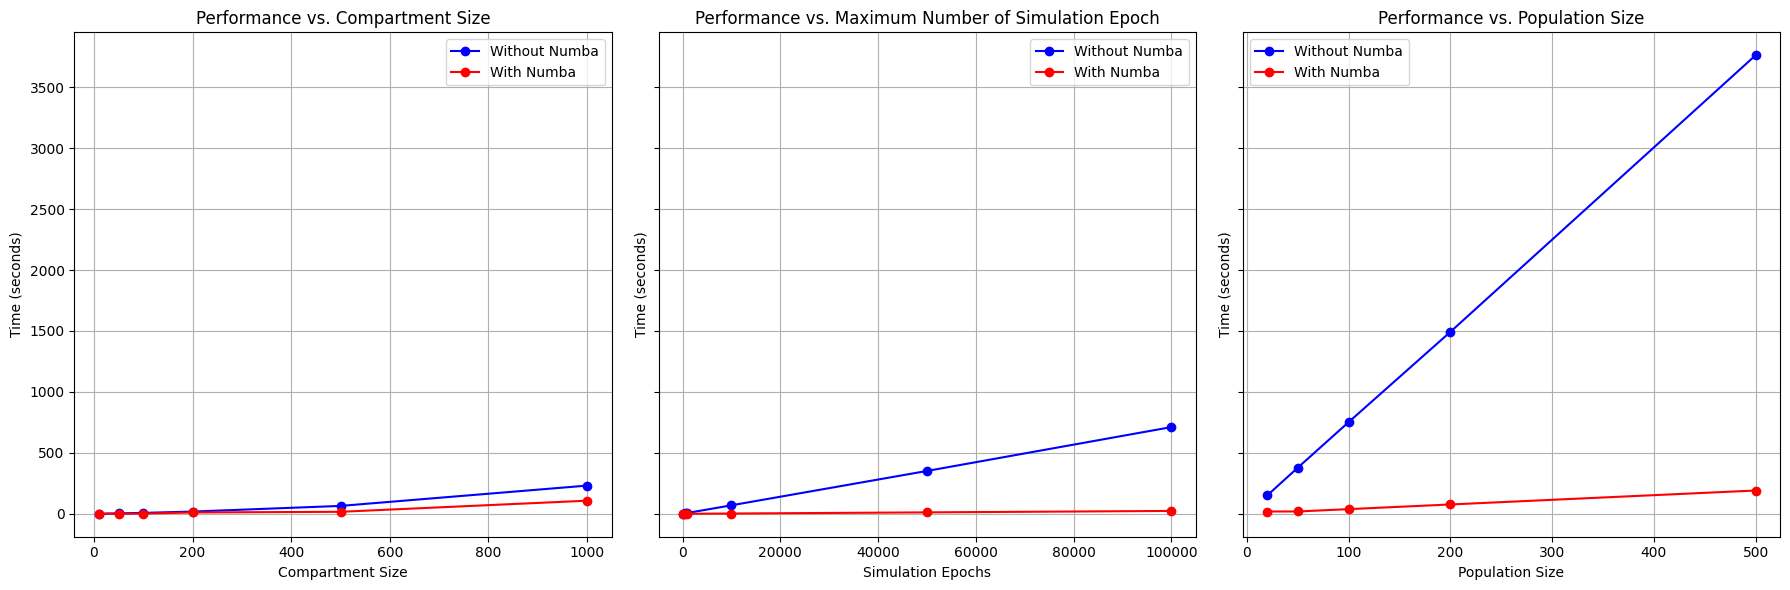

In [7]:
import matplotlib.pyplot as plt

# Benchmarking data
benchmarking_data = {
    "numba_com_size": {
        10: 10.832071781158447,
        50: 0.11558675765991211,
        100: 0.36243414878845215,
        200: 2.0385539531707764,
        500: 16.384703159332275,
        1000: 107.51107883453369,
    },
    "numba_sim_epochs": {
        100: 0.0251920223236084,
        500: 0.11624932289123535,
        1000: 0.2307727336883545,
        10000: 2.3095428943634033,
        50000: 11.656088590621948,
        100000: 23.539443016052246,
    },
    "numba_pop_size": {
        20: 18.735677242279053,
        50: 18.983787536621094,
        100: 38.32541823387146,
        200: 76.57288527488708,
        500: 191.06534576416016,
    },
    "com_size": {
        10: 0.7420475482940674,
        50: 3.518643617630005,
        100: 7.3738672733306885,
        200: 18.19509768486023,
        500: 64.69217228889465,
        1000: 231.44163966178894,
    },
    "sim_epochs": {
        100: 0.6864268779754639,
        500: 3.468745470046997,
        1000: 6.919107675552368,
        10000: 69.68381881713867,
        50000: 351.5794668197632,
        100000: 711.421303987503,
    },
    "pop_size": {
        20: 150.99141120910645,
        50: 378.38582491874695,
        100: 752.4636449813843,
        200: 1492.9554994106293,
        500: 3762.6383543014526
    }
}

# Extract data for plotting
x_com_size = sorted(benchmarking_data['com_size'].values())
y_com_size = [key for key in sorted(benchmarking_data['com_size'].keys())]

x_sim_epochs = sorted(benchmarking_data['sim_epochs'].values())
y_sim_epochs = [key for key in sorted(benchmarking_data['sim_epochs'].keys())]

x_pop_size = sorted(benchmarking_data['pop_size'].values())
y_pop_size = [key for key in sorted(benchmarking_data['pop_size'].keys())]

x_numba_com_size = sorted(benchmarking_data['numba_com_size'].values())
y_numba_com_size = [key for key in sorted(benchmarking_data['numba_com_size'].keys())]

x_numba_sim_epochs = sorted(benchmarking_data['numba_sim_epochs'].values())
y_numba_sim_epochs = [key for key in sorted(benchmarking_data['numba_sim_epochs'].keys())]

x_numba_pop_size = sorted(benchmarking_data['numba_pop_size'].values())
y_numba_pop_size = [key for key in sorted(benchmarking_data['numba_pop_size'].keys())]

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot Com Size
axs[0].plot(y_com_size, x_com_size, label='Without Numba', marker='o', color='b')
axs[0].plot(y_numba_com_size, x_numba_com_size, label='With Numba', marker='o', color='r')
axs[0].set_title('Performance vs. Compartment Size')
axs[0].set_xlabel('Compartment Size')
axs[0].set_ylabel('Time (seconds)')
axs[0].legend()
axs[0].grid(True)

# Plot Sim Epochs
axs[1].plot(y_sim_epochs, x_sim_epochs, label='Without Numba', marker='o', color='b')
axs[1].plot(y_numba_sim_epochs, x_numba_sim_epochs, label='With Numba', marker='o', color='r')
axs[1].set_title('Performance vs. Maximum Number of Simulation Epoch')
axs[1].set_xlabel('Simulation Epochs')
axs[1].set_ylabel('Time (seconds)')
axs[1].legend()
axs[1].grid(True)

# Plot Pop Size
axs[2].plot(y_pop_size, x_pop_size, label='Without Numba', marker='o', color='b')
axs[2].plot(y_numba_pop_size, x_numba_pop_size, label='With Numba', marker='o', color='r')
axs[2].set_title('Performance vs. Population Size')
axs[2].set_xlabel('Population Size')
axs[2].set_ylabel('Time (seconds)')
axs[2].legend()
axs[2].grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [16]:
g = np.ones((5, 7, 10, 10))

In [17]:
g.shape

(5, 7, 10, 10)

In [18]:
g[0, -1, 1, 1] = 19
g[1, -1, 1, 1] = 20
g[2, -1, 1, 1] = 21
g[3, -1, 1, 1] = 22
g[4, -1, 1, 1] = 23


In [19]:
g[0, -1, :, :]

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1., 19.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

In [20]:
h = g[:, -1, 1, 1]

In [21]:
h

array([19., 20., 21., 22., 23.])

In [22]:
h.shape

(5,)

In [23]:
k = g[:, 0, :, 0]
k.shape

(5, 10)

In [25]:
print((k.T * h).T)

[[19. 19. 19. 19. 19. 19. 19. 19. 19. 19.]
 [20. 20. 20. 20. 20. 20. 20. 20. 20. 20.]
 [21. 21. 21. 21. 21. 21. 21. 21. 21. 21.]
 [22. 22. 22. 22. 22. 22. 22. 22. 22. 22.]
 [23. 23. 23. 23. 23. 23. 23. 23. 23. 23.]]


In [23]:
import numpy as np

def compute_cost(predicted, target, model="MSE"):
    m, n, p = predicted.shape
    costs = np.zeros(m)

    if model == "MSE":
        # Mean Squared Error (MSE)
        for i in range(m):
            costs[i] = np.mean((target - predicted[i, :, :]) ** 2)
    
    elif model == "NCC":
        # Normalized Cross-Correlation (NCC)
        for i in range(m):
            target_mean = np.mean(target)
            pred_mean = np.mean(predicted[i, :, :])
            target_std = np.std(target)
            pred_std = np.std(predicted[i, :, :])
            
            # Calculate normalized cross-correlation
            if target_std > 0 and pred_std > 0:
                ncc = np.sum((target - target_mean) * (predicted[i, :, :] - pred_mean)) / (target_std * pred_std)
                ncc /= (n * p)  # Normalize by number of elements
            else:
                ncc = 0  # Handle cases where standard deviation is zero
            
            costs[i] = ncc
    
    return costs



In [25]:
m = 5  # Number of matrices
n, p = 4, 4  # Dimensions of each matrix

target = np.random.rand(n, p)

predicted = np.random.rand(m, n, p)

mse_costs = compute_cost(predicted, target, model="MSE")
ncc_costs = compute_cost(predicted, target, model="NCC")

print("\nMSE Costs:")
print(mse_costs)

print("\nNCC Costs:")
print(ncc_costs)



MSE Costs:
[0.28027748 0.22546851 0.25612361 0.12019708 0.24343893]

NCC Costs:
[-0.14153667 -0.12983694 -0.32230035  0.25053812 -0.30159352]


In [4]:
h = np.ones((10, 10, 10))
h

array([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]

In [27]:
import numpy as np
from scipy.ndimage import convolve

def box_blur_kernel(k):
    """
    Create a box blur kernel of size k x k.
    """
    return np.ones((k, k)) / (k * k)

def compute_cost(predicted, target, k, alpha, beta, delta_D):
    """
    Compute the fitness error between the developed patterns and the target pattern.
    
    Parameters:
    - predicted: Array of shape (m, w, h) containing developed patterns
    - target: 2D array of shape (w, h) containing the target pattern
    - k: Size of the box blur kernel
    - alpha: Error concentration threshold
    - beta: Equilibrium penalty threshold
    - delta_D: Maximum concentration change in D at the last time step
    
    Returns:
    - costs: Array of shape (m,) containing the cost for each pattern
    """
    m, w, h = predicted.shape
    kernel = box_blur_kernel(k)
    costs = np.zeros(m)
    
    # Convolve the target with the blur kernel
    blurred_target = convolve(target, kernel, mode='constant', cval=0.0)
    
    for i in range(m):
        # Convolve each predicted pattern with the blur kernel
        blurred_pred = convolve(predicted[i, :, :], kernel, mode='constant', cval=0.0)
        
        # Calculate the log difference error
        diff = np.abs(blurred_pred - blurred_target)
        log_diff = np.log1p(np.maximum(diff - alpha, 0))
        log_diff_error = np.mean(log_diff)
        
        # Calculate the equilibrium penalty
        equilibrium_penalty = np.maximum(delta_D - beta, 0)
        
        # Compute the total cost
        costs[i] = log_diff_error + equilibrium_penalty
    
    return costs

# Example usage
m, w, h = 5, 4, 4  # Number of matrices and dimensions
k = 3  # Kernel size
alpha = 0.1  # Threshold for log difference
beta = 0.05  # Threshold for equilibrium penalty
delta_D = 0.1  # Maximum concentration change

# Generate random target and predicted matrices
target = np.random.rand(w, h)
predicted = np.random.rand(m, w, h)

# Compute the cost
costs = compute_cost(predicted, target, k, alpha, beta, delta_D)

print("Cost for each pattern:")
print(costs)


Cost for each pattern:
[0.06375722 0.05257884 0.09874338 0.08572616 0.05643089]


In [28]:
import numpy as np

def randomize_array_elements(g, min_vals, max_vals, dtype='float'):
    """
    Randomly change the elements of an array `g` based on specific min and max values.

    Parameters:
    - g (np.ndarray): The array to be modified.
    - min_vals (list or np.ndarray): Minimum values for each element.
    - max_vals (list or np.ndarray): Maximum values for each element.
    - dtype (str): Type of random values to generate ('int' or 'float').

    Returns:
    - np.ndarray: The modified array with random values.
    """
    if len(min_vals) != len(max_vals) or len(min_vals) != len(g):
        raise ValueError("Length of min_vals, max_vals must match length of g.")

    # Ensure min_vals and max_vals are numpy arrays for broadcasting
    min_vals = np.array(min_vals)
    max_vals = np.array(max_vals)
    
    if dtype == 'int':
        # Generate random integers within specified ranges
        random_values = np.random.randint(min_vals, max_vals + 1, size=g.shape)
    elif dtype == 'float':
        # Generate random floats within specified ranges
        random_values = min_vals + (max_vals - min_vals) * np.random.random(size=g.shape)
    else:
        raise ValueError("dtype must be 'int' or 'float'.")

    return random_values

# Example usage
g = np.array([2, 5])
min_vals = [1, 3]
max_vals = [10, 20]

# Randomize with integer values
new_g_int = randomize_array_elements(g, min_vals, max_vals, dtype='int')
print("Randomized Integer Array:", new_g_int)

# Randomize with float values
new_g_float = randomize_array_elements(g, min_vals, max_vals, dtype='float')
print("Randomized Float Array:", new_g_float)



Randomized Integer Array: [ 8 13]
Randomized Float Array: [ 6.91371415 16.36858876]


In [32]:
print(np.random.rand())

0.20865816839894347


In [4]:
h = np.zeros((5, 5))

k = np.random.rand(h.shape[0], h.shape[1])
k

array([[0.88770356, 0.25823372, 0.45387527, 0.35714816, 0.77219659],
       [0.16269476, 0.46209521, 0.6169808 , 0.56318545, 0.80150168],
       [0.39150041, 0.48352353, 0.6432193 , 0.46843505, 0.95322576],
       [0.80234752, 0.03422849, 0.44802184, 0.60336315, 0.35079517],
       [0.07109062, 0.25149138, 0.50934929, 0.293038  , 0.11195059]])

In [5]:
mean = 2
std = 1
g = np.random.normal(loc=mean, scale=std, size=h.shape)

In [6]:
g

array([[3.29883089, 3.72217585, 2.15992216, 2.6026229 , 0.86707073],
       [2.35433945, 3.29063484, 1.25174258, 2.00160462, 2.75454925],
       [1.04613475, 0.4857813 , 2.22139635, 1.40315881, 2.09066288],
       [1.95120639, 2.5754006 , 0.43729611, 0.94525244, 1.28818329],
       [2.15980816, 3.85894526, 2.33098786, 2.86381871, 3.52529445]])

In [14]:
def apply_compartment_mutation(individual, mutation_rate, mean, std_dev):
    """
    Apply Gaussian mutation to the compartments of the individual.

    Parameters:
    - individual (np.ndarray): The array representing the individual with shape (z, y, x).
    - mutation_rate (float): The probability of mutation for each cell in the compartment.
    - mean (float): Mean of the Gaussian distribution used for mutation.
    - std_dev (float): Standard deviation of the Gaussian distribution used for mutation.

    Returns:
    - np.ndarray: The mutated individual array.
    """
    num_species = int(individual[-1, -1, 0])  # Number of species
    compartment_size = individual[0, :, :].shape  # Shape of the compartments

    for i in range(1, num_species * 2, 2):
        # Create random mask where mutation will happen
        mut_mask = np.random.rand(compartment_size[0], compartment_size[1]) < mutation_rate
        # Generate Gaussian noise
        noise = np.random.normal(loc=mean, scale=std_dev, size=compartment_size)
        # Apply noise where mutation mask is true
        individual[i, :, :] += np.where(mut_mask, noise, 0)
        individual[i, :, :] = np.maximum(individual[i, :, :], 0)

    return individual


In [15]:
# Example individual array
individual = np.ones((4, 5, 5))  # (z, y, x) shape with dummy values

# Set some example values
individual[-1, -1, 0] = 2  # Number of species

# Mutation parameters
mutation_rate = 0.1  # 10% mutation probability
mean = 0.0
std_dev = 1.0

# Apply mutation
mutated_individual = apply_compartment_mutation(individual, mutation_rate, mean, std_dev)

print("Original Individual:")
print(individual)

print("Mutated Individual:")
print(mutated_individual)


Original Individual:
[[[1.         1.         1.         1.         1.        ]
  [1.         1.         1.         1.         1.        ]
  [1.         1.         1.         1.         1.        ]
  [1.         1.         1.         1.         1.        ]
  [1.         1.         1.         1.         1.        ]]

 [[0.         1.         1.         1.         1.        ]
  [1.         1.         1.         1.         1.        ]
  [0.         1.         0.         1.         1.        ]
  [1.         1.         1.         1.         1.        ]
  [1.         1.5715114  1.         1.43289337 1.        ]]

 [[1.         1.         1.         1.         1.        ]
  [1.         1.         1.         1.         1.        ]
  [1.         1.         1.         1.         1.        ]
  [1.         1.         1.         1.         1.        ]
  [1.         1.         1.         1.         1.        ]]

 [[1.         1.         1.         0.74440089 1.        ]
  [1.         1.         1.  

In [16]:
m = np.random.rand(5, 5) < .2

In [17]:
m

array([[False, False, False,  True, False],
       [False, False,  True,  True,  True],
       [False, False, False,  True, False],
       [False, False, False, False,  True],
       [ True, False, False, False, False]])

In [23]:
v = np.ones((5, 5, 5))

In [24]:
v[-1, 0, :4].shape

(4,)

In [25]:
h = np.zeros(3)

In [26]:
h.shape

(3,)

In [27]:
print(np.random.rand(2))

[0.71041241 0.90139512]


In [28]:
import numpy as np

def apply_compartment_mutation(individual, mutation_rate, mean, std_dev, min_val=None, max_val=None, distribution="normal"):
    """
    Apply mutation to the compartments of the individual based on the specified distribution.
    This mutation function is specific for pattern matrices of the species.

    Parameters:
    - individual (np.ndarray): The array representing the individual with shape (z, y, x).
    - mutation_rate (float): The probability of mutation for each cell in the compartment.
    - mean (float): Mean of the Gaussian distribution used for mutation (ignored if uniform distribution).
    - std_dev (float): Standard deviation of the Gaussian distribution used for mutation (ignored if uniform distribution).
    - min_val (float, optional): Minimum value for uniform distribution (required if distribution is uniform).
    - max_val (float, optional): Maximum value for uniform distribution (required if distribution is uniform).
    - distribution (str): Type of distribution to use for mutation ("normal" or "uniform").

    Returns:
    - np.ndarray: The mutated individual array.
    """
    num_species = int(individual[-1, -1, 0])  # Number of species
    compartment_size = individual[0, :, :].shape  # Shape of the compartments

    if distribution not in ["normal", "uniform"]:
        raise ValueError("Distribution must be either 'normal' or 'uniform'")

    for i in range(1, num_species * 2, 2):
        # Create random mask where mutation will happen (False or True)
        mut_mask = np.random.rand(compartment_size[0], compartment_size[1]) < mutation_rate
        
        if distribution == "normal":
            noise = np.random.normal(loc=mean, scale=std_dev, size=compartment_size)
        elif distribution == "uniform":
            if min_val is None or max_val is None:
                raise ValueError("Both min_val and max_val must be provided for uniform distribution")
            noise = np.random.uniform(low=min_val, high=max_val, size=compartment_size)

        # Apply noise where mutation mask is true
        individual[i, :, :] += np.where(mut_mask, noise, 0)
        # Ensure non-negative values
        individual[i, :, :] = np.maximum(individual[i, :, :], 0)

    return individual


In [29]:
# Example individual array
individual = np.zeros((4, 5, 5))  # (z, y, x) shape with dummy values

# Set some example values
individual[-1, -1, 0] = 2  # Number of species

# Mutation parameters
mutation_rate = 0.1  # 10% mutation probability
mean = 0.0
std_dev = 1.0
min_val = 0.0
max_val = 1.0

# Apply Gaussian mutation
mutated_individual_gaussian = apply_compartment_mutation(individual, mutation_rate, mean, std_dev, distribution="normal")

# Apply Uniform mutation
mutated_individual_uniform = apply_compartment_mutation(individual, mutation_rate, mean, std_dev, min_val, max_val, distribution="uniform")

print("Original Individual:")
print(individual)

print("Mutated Individual (Gaussian):")
print(mutated_individual_gaussian)

print("Mutated Individual (Uniform):")
print(mutated_individual_uniform)


Original Individual:
[[[0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.        ]]

 [[0.         0.         0.         0.06362508 0.3565655 ]
  [0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.0513885 ]
  [0.         0.         0.         0.         0.45871863]
  [0.         0.         0.         0.         0.        ]]

 [[0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.        ]]

 [[0.5153132  0.         0.         0.75563769 0.        ]
  [0.85855519 0.         0.  

In [41]:
import numpy as np

def apply_parameter_mutation(individual, mutation_rate, means, std_devs, min_vals, max_vals, distribution):
    """
    Apply mutation to specific regions of the individual based on the provided mutation rate and distribution.

    Parameters:
    - individual (np.ndarray): The array representing the individual with shape (z, y, x).
    - mutation_rate (float): The probability of mutation for each parameter.
    - means (list or np.ndarray): Means for the normal distribution.
    - std_devs (list or np.ndarray): Standard deviations for the normal distribution.
    - min_vals (list or np.ndarray): Minimum values for the uniform distribution.
    - max_vals (list or np.ndarray): Maximum values for the uniform distribution.
    - distribution (str): Type of distribution for mutation ("normal" or "uniform").

    Returns:
    - np.ndarray: The mutated individual array.
    """
    num_species = int(individual[-1, -1, 0])
    num_pairs = int(individual[-1, -1, 1])
    pair_start = num_species * 2
    pair_stop = pair_start + (num_pairs * 2)

    # Ensure means, std_devs, min_vals, and max_vals are numpy arrays for easy indexing
    means = np.array(means)
    std_devs = np.array(std_devs)
    min_vals = np.array(min_vals)
    max_vals = np.array(max_vals)

    # Apply mutation to species parameters
    for i in range(0, num_species * 2, 2):
        mut_mask = np.random.rand(3) < mutation_rate
        if distribution == "normal":
            species_noise = np.random.normal(loc=means[i//2*3:(i//2+1)*3], scale=std_devs[i//2*3:(i//2+1)*3])
        elif distribution == "uniform":
            species_noise = np.random.uniform(low=min_vals[i//2*3:(i//2+1)*3], high=max_vals[i//2*3:(i//2+1)*3])
        
        # Apply mutation noise to the individual array
        individual[-1, i, :3] += np.where(mut_mask, species_noise, 0)

    # Apply mutation to pairs of parameters
    for i in range(pair_start, pair_stop, 2):
        mut_mask = np.random.rand(4) < mutation_rate
        if distribution == "normal":
            pair_noise = np.random.normal(loc=means[num_species*3 + (i-pair_start)//2*4:num_species*3 + (i-pair_start)//2*4 + 4],
                                          scale=std_devs[num_species*3 + (i-pair_start)//2*4:num_species*3 + (i-pair_start)//2*4 + 4])
        elif distribution == "uniform":
            pair_noise = np.random.uniform(low=min_vals[num_species*3 + (i-pair_start)//2*4:num_species*3 + (i-pair_start)//2*4 + 4],
                                            high=max_vals[num_species*3 + (i-pair_start)//2*4:num_species*3 + (i-pair_start)//2*4 + 4])
        
        # Apply mutation noise to the individual array
        individual[i, 1, :4] += np.where(mut_mask, pair_noise, 0)

    return individual

# Example individual array
individual = np.zeros((4, 5, 5))  # (z, y, x) shape with dummy values

# Set example parameters
mutation_rate = 0.9  # 90% mutation probability
means = [0.0, 1.0, -1.0, 0.5, 1.5, 2.0]  # Example means
std_devs = [1.0, 0.5, 0.2, 0.3, 1.0, 0.7]  # Example standard deviations
min_vals = [0.0, 0.0, 0.0, 0.1, 0.1, 0.1]  # Example min values
max_vals = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]  # Example max values

# Apply mutation
mutated_individual = apply_parameter_mutation(individual, mutation_rate, means, std_devs, min_vals, max_vals, distribution="normal")

print("Original Individual:")
print(individual)

print("Mutated Individual:")
print(mutated_individual)



Original Individual:
[[[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]]
Mutated Individual:
[[[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]]


In [39]:
# Example individual array
individual = np.zeros((4, 5, 5))  # (z, y, x) shape with dummy values

# Set example parameters
mutation_rate = 0.9  # 10% mutation probability
means = [0.0, 1.0, -1.0, 0.5, 1.5, 2.0]  # Example means
std_devs = [1.0, 0.5, 0.2, 0.3, 1.0, 0.7]  # Example standard deviations
min_vals = [0.0, 0.0, 0.0, 0.1, 0.1, 0.1]  # Example min values
max_vals = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]  # Example max values

# Apply mutation
mutated_individual = apply_parameter_mutation(individual, mutation_rate, means, std_devs, min_vals, max_vals, distribution="normal")

print("Original Individual:")
print(individual)

print("Mutated Individual:")
print(mutated_individual)


Original Individual:
[[[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]]
Mutated Individual:
[[[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]]


In [50]:
def apply_parameter_mutation(individual, mutation_rate, means, std_devs, min_vals, max_vals, distribution):
    """
    Apply mutation to specific regions of the individual based on the provided mutation rate and distribution.

    Parameters:
    - individual (np.ndarray): The array representing the individual with shape (z, y, x).
    - mutation_rate (float): The probability of mutation for each parameter.
    - means (list or np.ndarray): Means for the normal distribution.
    - std_devs (list or np.ndarray): Standard deviations for the normal distribution.
    - min_vals (list or np.ndarray): Minimum values for the uniform distribution.
    - max_vals (list or np.ndarray): Maximum values for the uniform distribution.
    - distribution (str): Type of distribution for mutation ("normal" or "uniform").

    Returns:
    - np.ndarray: The mutated individual array.
    """
    num_species = int(individual[-1, -1, 0])  # Number of species
    compartment_size = individual[0, :, :].shape  # Shape of the compartments
    num_pairs = int(individual[-1, -1, 1])  # Number of pairs
    pair_start = int(num_species * 2)  # Start index for pairs
    pair_stop = int(pair_start + (num_pairs * 2))  # End index for pairs

    # Ensure means, std_devs, min_vals, and max_vals are numpy arrays for easy indexing
    means = np.array(means)
    std_devs = np.array(std_devs)
    min_vals = np.array(min_vals)
    max_vals = np.array(max_vals)

    count = 0
    
    # Apply mutation to species parameters
    for i in range(0, num_species * 2, 2):
        mut_mask = np.random.rand(3) < mutation_rate
        if distribution == "normal":
            species_noise = np.random.normal(loc=means[count:count+3], scale=std_devs[count:count+3])
        elif distribution == "uniform":
            species_noise = np.random.uniform(low=min_vals[count:count+3], high=max_vals[count:count+3])
        
        individual[-1, i, :3] += np.where(mut_mask, species_noise, 0)
        count += 3

    # Apply mutation to pairs of parameters
    for i in range(pair_start, pair_stop, 2):
        mut_mask = np.random.rand(4) < mutation_rate
        if distribution == "normal":
            pair_noise = np.random.normal(loc=means[count:count+4], scale=std_devs[count:count+4])
        elif distribution == "uniform":
            pair_noise = np.random.uniform(low=min_vals[count:count+4], high=max_vals[count:count+4])
        
        individual[i, 1, :4] += np.where(mut_mask, pair_noise, 0)
        count += 4

    return individual



In [52]:
# Example individual array
individual = np.ones((4, 5, 5))  # (z, y, x) shape with dummy values

# Set example parameters
mutation_rate = 0.1  # 10% mutation probability
means = [0.0, 1.0, -1.0, 0.5, 1.5, 2.0]  # Example means
std_devs = [1.0, 0.5, 0.2, 0.3, 1.0, 0.7]  # Example standard deviations
min_vals = [0.0, 0.0, 0.0, 0.1, 0.1, 0.1]  # Example min values
max_vals = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]  # Example max values

# Apply mutation
mutated_individual = apply_parameter_mutation(individual, mutation_rate, means, std_devs, min_vals, max_vals, distribution="normal")

print("Original Individual:")
print(individual)

print("Mutated Individual:")
print(mutated_individual)


ValueError: operands could not be broadcast together with shapes (4,) (3,) () 

In [48]:
individual = np.zeros((4, 5, 5))
h = np.ones((4, 5, 5))

In [49]:
h

array([[[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]])

In [73]:
import numpy as np

def apply_parameter_mutation(individual, mutation_rate, means, std_devs, min_vals, max_vals, distribution):
    """
    Apply mutation to specific regions of the individual based on the provided mutation rate and distribution.

    Parameters:
    - individual (np.ndarray): The array representing the individual with shape (z, y, x).
    - mutation_rate (float): The probability of mutation for each parameter.
    - means (list or np.ndarray): Means for the normal distribution.
    - std_devs (list or np.ndarray): Standard deviations for the normal distribution.
    - min_vals (list or np.ndarray): Minimum values for the uniform distribution.
    - max_vals (list or np.ndarray): Maximum values for the uniform distribution.
    - distribution (str): Type of distribution for mutation ("normal" or "uniform").

    Returns:
    - np.ndarray: The mutated individual array.
    """
    num_species = int(individual[-1, -1, 0])  # Number of species
    num_pairs = int(individual[-1, -1, 1])  # Number of pairs
    pair_start = num_species * 2  # Start index for pairs
    pair_stop = pair_start + (num_pairs * 2)  # End index for pairs

    count = 0
    # Apply mutation to species parameters
    for i in range(0, num_species * 2, 2):
        mut_mask = np.random.rand(3) < mutation_rate
        if distribution == "normal":
            for j in range(3):
                individual[-1, i, j] += np.random.normal(loc=means[count], scale=std_devs[count]) * mut_mask[j]
        elif distribution == "uniform":
            for j in range(3):
                individual[-1, i, j] += (np.random.uniform(low=min_vals[count], high=max_vals[count]) - individual[-1, i, j]) * mut_mask[j]
        count += 1

    # Apply mutation to pairs of parameters
    for i in range(pair_start, pair_stop, 2):
        mut_mask = np.random.rand(4) < mutation_rate
        if distribution == "normal":
            for j in range(4):
                individual[i, 1, j] += np.random.normal(loc=means[count], scale=std_devs[count]) * mut_mask[j]
        elif distribution == "uniform":
            for j in range(4):
                individual[i, 1, j] += (np.random.uniform(low=min_vals[count], high=max_vals[count]) - individual[i, 1, j]) * mut_mask[j]
        count += 1

    return individual

# Example individual array
individual = np.full((4, 10, 10), 2)  # (z, y, x) shape with dummy values
print("Original Individual:")
print(individual)

# Set example parameters
mutation_rate = 0.9  # 90% mutation probability
means = [0.0, 1.0, -1.0, 0.5, 1.5, 2.0]  # Example means
std_devs = [5, 6, 6, 6, 6, 7]  # Example standard deviations
min_vals = [0.0, 0.0, 0.0, 0.1, 0.1, 0.1]  # Example min values
max_vals = [20, 20, 20, 20, 20, 20]  # Example max values

# Apply mutation
mutated_individual = apply_parameter_mutation(individual, mutation_rate, means, std_devs, min_vals, max_vals, distribution="normal")



print("Mutated Individual:")
print(mutated_individual)


Original Individual:
[[[2 2 2 2 2 2 2 2 2 2]
  [2 2 2 2 2 2 2 2 2 2]
  [2 2 2 2 2 2 2 2 2 2]
  [2 2 2 2 2 2 2 2 2 2]
  [2 2 2 2 2 2 2 2 2 2]
  [2 2 2 2 2 2 2 2 2 2]
  [2 2 2 2 2 2 2 2 2 2]
  [2 2 2 2 2 2 2 2 2 2]
  [2 2 2 2 2 2 2 2 2 2]
  [2 2 2 2 2 2 2 2 2 2]]

 [[2 2 2 2 2 2 2 2 2 2]
  [2 2 2 2 2 2 2 2 2 2]
  [2 2 2 2 2 2 2 2 2 2]
  [2 2 2 2 2 2 2 2 2 2]
  [2 2 2 2 2 2 2 2 2 2]
  [2 2 2 2 2 2 2 2 2 2]
  [2 2 2 2 2 2 2 2 2 2]
  [2 2 2 2 2 2 2 2 2 2]
  [2 2 2 2 2 2 2 2 2 2]
  [2 2 2 2 2 2 2 2 2 2]]

 [[2 2 2 2 2 2 2 2 2 2]
  [2 2 2 2 2 2 2 2 2 2]
  [2 2 2 2 2 2 2 2 2 2]
  [2 2 2 2 2 2 2 2 2 2]
  [2 2 2 2 2 2 2 2 2 2]
  [2 2 2 2 2 2 2 2 2 2]
  [2 2 2 2 2 2 2 2 2 2]
  [2 2 2 2 2 2 2 2 2 2]
  [2 2 2 2 2 2 2 2 2 2]
  [2 2 2 2 2 2 2 2 2 2]]

 [[2 2 2 2 2 2 2 2 2 2]
  [2 2 2 2 2 2 2 2 2 2]
  [2 2 2 2 2 2 2 2 2 2]
  [2 2 2 2 2 2 2 2 2 2]
  [2 2 2 2 2 2 2 2 2 2]
  [2 2 2 2 2 2 2 2 2 2]
  [2 2 2 2 2 2 2 2 2 2]
  [2 2 2 2 2 2 2 2 2 2]
  [2 2 2 2 2 2 2 2 2 2]
  [2 2 2 2 2 2 2 2 2 2]]]


IndexError: index 4 is out of bounds for axis 0 with size 4

In [88]:
import numpy as np

# Define the arrays
o = np.ones((7, 10, 10))
g = np.zeros((4, 10, 10))

# Add the first two slices of g to slices 5 and 6 of o
o[5:7, :, :] += g[:2, :, :]

# Add the last two slices of g to slices 4 and 5 of o
o[-3:-1, :, :] += g[2:, :, :]

print("Updated o:")
print(o)


Updated o:
[[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

In [85]:
o[5:7, :, :] += g[:2, :, :]

In [86]:
o[-3:-1, :, :] += g[2:, :, :]

In [87]:
o

array([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]

In [14]:
import itertools
import numpy as np

def pair_finding(num_species):

    last = num_species + 1
    species = [i for i in range(1, num_species + 2, 1)]
    pairs = list(itertools.combinations(species, 2))

    out_pairs = [pair for pair in pairs if last in pair]

    return out_pairs

def species_initialization(compartment_size, pairs):

    num_species = len(pairs) + 1
    num_matrices = num_species * 2
    init_matrix = np.random.rand(num_matrices, compartment_size[0], compartment_size[1])

    for i in range(len(pairs)):
        m = np.random.rand(2, compartment_size[0], compartment_size[1])
        m[-1, 0, 0] = int(pairs[i][0])
        m[-1, 0, 1] = int(pairs[i][1])
        init_matrix[i*2+2:i*2+4, :, :] = m


    return init_matrix


In [15]:
c = pair_finding(4)
c

[(1, 5), (2, 5), (3, 5), (4, 5)]

In [16]:
g = species_initialization(compartment_size=(5, 5), pairs=c)
g

array([[[7.71753138e-01, 8.03431273e-01, 6.70264992e-01, 3.74965168e-01,
         2.86647460e-01],
        [5.37497661e-01, 5.46922135e-01, 9.94662543e-01, 5.44639773e-01,
         9.70285772e-01],
        [5.63644610e-02, 2.77522072e-01, 7.28200901e-01, 5.12885000e-01,
         7.00108205e-01],
        [4.02184524e-01, 9.84031504e-01, 4.96276390e-01, 2.42480129e-01,
         2.43042472e-01],
        [3.88995534e-02, 3.91651474e-01, 5.48604670e-01, 3.41184826e-01,
         5.56923553e-01]],

       [[8.34654634e-02, 4.13479939e-01, 3.10827443e-01, 7.64776174e-01,
         5.35056892e-01],
        [7.55279425e-01, 2.32138136e-01, 5.90545433e-01, 7.14172466e-01,
         3.07999687e-01],
        [6.55437885e-01, 9.38135468e-01, 8.15189080e-01, 7.62115380e-01,
         1.60242141e-01],
        [4.76587956e-01, 1.67790328e-01, 5.48127783e-01, 3.91789386e-01,
         5.44420006e-01],
        [3.11481570e-01, 1.40150721e-01, 3.70832592e-01, 1.78033142e-01,
         9.24282052e-01]],

      

In [22]:
h = np.random.choice(np.arange(1, 10))
h

3

In [25]:
g = np.arange(2, 10)

In [26]:
g

array([2, 3, 4, 5, 6, 7, 8, 9])

In [32]:
x = np.random.rand(4, 5, 6)  # Example 3D matrix with shape (4, 5, 6)
z_index = [1, 2]
x_modified = np.delete(x, z_index, axis=0)


In [33]:
x_modified.shape

(2, 5, 6)

In [34]:
import numpy as np

# Define the array
X = np.array([5, 15, 8, 12, 7, 20, 1, 25, 9, 14])

# Define the threshold
threshold = 10

# Create boolean mask based on the threshold condition
mask = X > threshold

# Use the mask to divide the array
above_threshold = X[mask]
below_threshold = X[~mask]

# Print results
print("Original array:", X)
print("Above threshold:", above_threshold)
print("Below threshold:", below_threshold)


Original array: [ 5 15  8 12  7 20  1 25  9 14]
Above threshold: [15 12 20 25 14]
Below threshold: [5 8 7 1 9]


In [36]:
import numpy as np

# Define the array and list
x = np.array([12, 12, 1, 23, 21, 56, 12, 24, 87])
y = ["t", "th", "v", "x", "as", "sa", "sg", "w", "op"]

# Use list comprehensions to create the lists based on the condition
h = [y[i] for i in range(len(x)) if x[i] < 20]
g = [y[i] for i in range(len(x)) if x[i] >= 20]

# Print results
print("h (x < 20):", h)
print("g (x >= 20):", g)


h (x < 20): ['t', 'th', 'v', 'sg']
g (x >= 20): ['x', 'as', 'sa', 'w', 'op']


In [37]:
h = np.zeros(12)

In [38]:
h

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [39]:
len(h)

12

In [40]:
h = [12, 12, 32, 12, 12, 12, 12]
for i in range(len(h)):
    h[i] = h[i] * 2

In [41]:
h

[24, 24, 64, 24, 24, 24, 24]

In [42]:
import numpy as np

# Define the array and list
x = np.array([12, 12, 1, 23, 21, 56, 12, 24, 87])
y = ["t", "th", "v", "x", "as", "sa", "sg", "w", "op"]
# Get the indices that would sort x
sorted_indices = np.argsort(x)

# Select the first five indices (corresponding to the lowest costs)
lowest_indices = sorted_indices[:5]

# Use these indices to get the corresponding elements from y
lowest_costs = [y[i] for i in lowest_indices]
lowest_costs

['v', 't', 'th', 'sg', 'as']

In [43]:
sorted_indices

array([2, 0, 1, 6, 4, 3, 7, 5, 8])